In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the symbolic function and derivatives
def newton_method_1d(func_expr_str, x0, tol=1e-5, max_iter=100):
    x = sp.Symbol('x')
    
    # Parse the input string into a symbolic expression
    f_expr = sp.sympify(func_expr_str)
    
    # First and second derivatives
    f_prime = sp.diff(f_expr, x)
    f_double_prime = sp.diff(f_prime, x)
    
    # Convert to numerical functions
    f = sp.lambdify(x, f_expr, modules='numpy')
    f1 = sp.lambdify(x, f_prime, modules='numpy')
    f2 = sp.lambdify(x, f_double_prime, modules='numpy')
    
    # Newton's iteration
    current_x = x0
    history = [current_x]

    for i in range(max_iter):
        f1_val = f1(current_x)
        f2_val = f2(current_x)
        
        if abs(f1_val) < tol:
            print("Converged based on gradient tolerance.")
            break
        if f2_val == 0:
            print("Second derivative is zero. Newton's method fails.")
            break
        
        next_x = current_x - f1_val / f2_val
        history.append(next_x)

        print(f"Iteration {i+1}: x = {next_x:.6f}, f'(x) = {f1_val:.6f}, f''(x) = {f2_val:.6f}")

        if abs(next_x - current_x) < tol:
            print("Converged based on x change.")
            break
        current_x = next_x
    else:
        print("Maximum iterations reached.")

    return current_x, f(current_x), history

# Step 2: Plot the function and iterations
def plot_newton_path(func_expr_str, history):
    x = sp.Symbol('x')
    f_expr = sp.sympify(func_expr_str)
    f = sp.lambdify(x, f_expr, modules='numpy')

    x_vals = np.linspace(min(history)-1, max(history)+1, 400)
    y_vals = f(x_vals)

    plt.plot(x_vals, y_vals, label='f(x)')
    plt.plot(history, [f(xi) for xi in history], 'ro-', label='Newton steps')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title("Newton's Method Path")
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 3: Example usage
if __name__ == "__main__":
    func_input = input("Enter the function f(x) to minimize (e.g. x**4 - 3*x**3 + 2):\n")
    x0 = float(input("Enter the initial guess x0: "))
    tol = float(input("Enter tolerance (e.g. 1e-5): "))
    max_iter = int(input("Enter maximum number of iterations: "))

    try:
        x_opt, f_opt, path = newton_method_1d(func_input, x0, tol, max_iter)
        print(f"\nOptimal x: {x_opt}")
        print(f"Minimum value f(x): {f_opt}")
        plot_newton_path(func_input, path)
    except Exception as e:
        print("Error:", e)


Enter the function f(x) to minimize (e.g. x**4 - 3*x**3 + 2):
 0.65 - (0.75 / (1 + x**2)) - 0.65*x + atan(1/x)
Enter the initial guess x0:  0.1
Enter tolerance (e.g. 1e-5):  0.01
Enter maximum number of iterations:  100


Iteration 1: x = 1.028362, f'(x) = -1.493055, f''(x) = 1.608268
Iteration 2: x = 7.937000, f'(x) = -0.771648, f''(x) = 0.111693
Iteration 3: x = 244.614101, f'(x) = -0.662719, f''(x) = 0.002800
Iteration 4: x = 4801629.786823, f'(x) = -0.650017, f''(x) = 0.000000
Iteration 5: x = 35979040823094321152.000000, f'(x) = -0.650000, f''(x) = 0.000000
Iteration 6: x = 15136731400046770184019529230945352611271942183257041272832.000000, f'(x) = -0.650000, f''(x) = 0.000000
Error: (34, 'Numerical result out of range')


Example: f(x) = 0.65 - (0.75 / (1 + x**2)) - 0.65*x + atan(1/x)


Enter the function f(x):
 0.65 - (0.75 / (1 + x**2)) - 0.65*x + atan(1/x)
Enter the initial guess x0:  0.1
Enter the convergence tolerance (e.g. 0.01):  0.01
Enter maximum number of iterations:  100


Iteration 1: x = 1.028362, f'(x) = -1.493055, f''(x) = 1.608268
Iteration 2: x = 7.937000, f'(x) = -0.771648, f''(x) = 0.111693
Iteration 3: x = 244.614101, f'(x) = -0.662719, f''(x) = 0.002800
Iteration 4: x = 4801629.786823, f'(x) = -0.650017, f''(x) = 0.000000
Second derivative near zero. Stopping to prevent divergence.

Approximate optimal x: 4801629.786823
Minimum value f(x): -3121058.711435


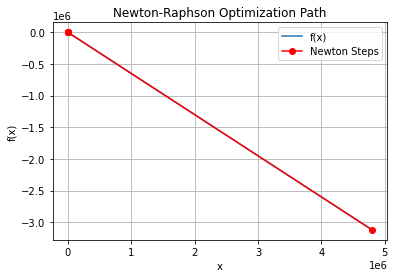

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Newton's Method Function
def newton_method_1d(func_expr_str, x0, tol=1e-5, max_iter=100):
    x = sp.Symbol('x')
    f_expr = sp.sympify(func_expr_str)
    f_prime = sp.diff(f_expr, x)
    f_double_prime = sp.diff(f_prime, x)

    f = sp.lambdify(x, f_expr, modules='numpy')
    f1 = sp.lambdify(x, f_prime, modules='numpy')
    f2 = sp.lambdify(x, f_double_prime, modules='numpy')

    current_x = x0
    history = [current_x]

    for i in range(max_iter):
        try:
            f1_val = f1(current_x)
            f2_val = f2(current_x)

            if abs(f1_val) < tol:
                print("Converged: Gradient near zero.")
                break
            if abs(f2_val) < 1e-8:
                print("Second derivative near zero. Stopping to prevent divergence.")
                break

            next_x = current_x - f1_val / f2_val
            history.append(next_x)

            print(f"Iteration {i+1}: x = {next_x:.6f}, f'(x) = {f1_val:.6f}, f''(x) = {f2_val:.6f}")

            if abs(next_x - current_x) < tol:
                print("Converged: Change in x below tolerance.")
                break

            current_x = next_x
        except Exception as e:
            print(f"Numerical error at iteration {i+1}: {e}")
            break

    else:
        print("Maximum iterations reached.")

    return current_x, f(current_x), history

# Plotting Function
def plot_newton_path(func_expr_str, history):
    x = sp.Symbol('x')
    f_expr = sp.sympify(func_expr_str)
    f = sp.lambdify(x, f_expr, modules='numpy')

    x_vals = np.linspace(min(history)-0.5, max(history)+0.5, 400)
    y_vals = f(x_vals)

    plt.plot(x_vals, y_vals, label='f(x)')
    plt.plot(history, [f(xi) for xi in history], 'ro-', label='Newton Steps')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title("Newton-Raphson Optimization Path")
    plt.grid(True)
    plt.legend()
    plt.show()

# Main Execution Block
if __name__ == "__main__":
    print("Example: f(x) = 0.65 - (0.75 / (1 + x**2)) - 0.65*x + atan(1/x)")
    func_input = input("Enter the function f(x):\n")
    x0 = float(input("Enter the initial guess x0: "))
    tol = float(input("Enter the convergence tolerance (e.g. 0.01): "))
    max_iter = int(input("Enter maximum number of iterations: "))

    try:
        x_opt, f_opt, path = newton_method_1d(func_input, x0, tol, max_iter)
        print(f"\nApproximate optimal x: {x_opt:.6f}")
        print(f"Minimum value f(x): {f_opt:.6f}")
        plot_newton_path(func_input, path)
    except Exception as e:
        print("Error during execution:", e)
